Médias móveis são indicadores técnicos que suavizam os preços ao longo do tempo para identificar tendências, calculando a média de preços em períodos específicos (ex.: 10, 50 ou 200 dias).

In [ ]:
from dotenv import load_dotenv
import os
import pandas as pd
import ccxt
import pandas_ta as ta

load_dotenv()

binance_api_key = os.getenv("BINANCE_API_KEY")
binance_api_secret = os.getenv("BINANCE_API_SECRET")

binance = ccxt.binance({
    "enableRateLimit": True,
    "options": {
        "defaultType": "future"
    },
    "apiKey": binance_api_key,
    "secret": binance_api_secret,
})

symbol = "BTCUSDT"
timeframe = "2h"
bars = binance.fetch_ohlcv(symbol, timeframe, limit=500)

df_candles = pd.DataFrame(bars, columns=["time", "abertura", "max", "min", "fechamento", "volume"])
df_candles["time"] = pd.to_datetime(df_candles["time"], unit="ms", utc=True).map(lambda x: x.tz_convert("America/Sao_Paulo"))

In [2]:
mas = [5, 10, 20, 50, 200]

for ma in mas:
    df_candles[f"SMA_{ma}"] = ta.sma(df_candles["fechamento"], length=ma)
    df_candles[f"EMA_{ma}"] = ta.ema(df_candles["fechamento"], length=ma)

<Axes: >

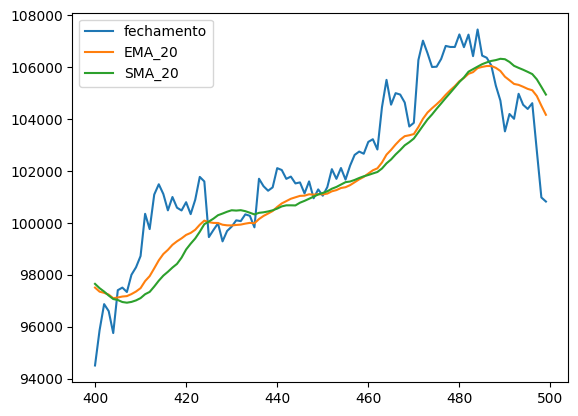

In [3]:
df_candles[["fechamento", "EMA_20", "SMA_20"]][-100:].plot()